## Task-D: Collinear features and their effect on linear models

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('task_d.csv')

In [ ]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [ ]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

Text(0.5, 1.0, 'Correlation plot')

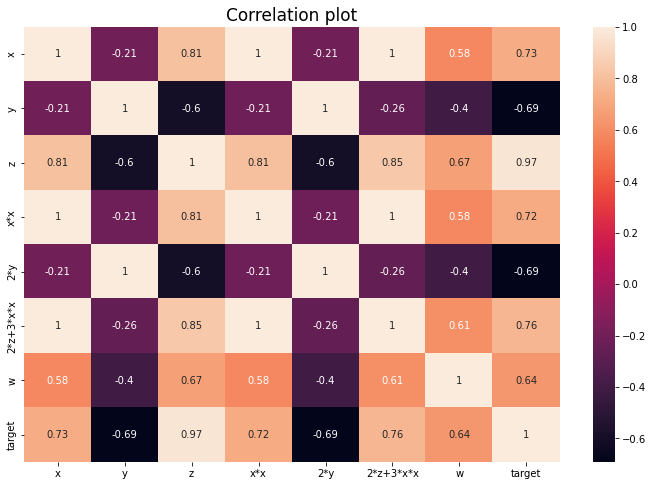

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation plot",fontsize=17)

In [ ]:
f1 = make_scorer(f1_score)
grid_s=GridSearchCV(SGDClassifier(loss='log'),param_grid={'alpha':[0.0001,0.001,0.1,1,10]},cv=10,scoring=f1,return_train_score=True)
grid_s.fit(X,Y)

GridSearchCV(cv=10, estimator=SGDClassifier(loss='log'),
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10]},
             return_train_score=True, scoring=make_scorer(f1_score))

In [ ]:
results=pd.DataFrame(grid_s.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000951,0.000264,0.001165,0.000467,0.0001,{'alpha': 0.0001},1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
1,0.000712,0.000011,0.000854,0.000018,0.001,{'alpha': 0.001},1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
2,0.000844,0.000192,0.001058,0.000389,0.1,{'alpha': 0.1},1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
3,0.000735,0.000021,0.000897,0.000161,1,{'alpha': 1},1.000000,1.000000,1.000000,1.000000,...,0.988764,1.0,1.000000,1.000000,1.000000,1.000000,0.988764,1.00000,0.997753,0.004494
4,0.000710,0.000020,0.000898,0.000108,10,{'alpha': 10},0.666667,0.666667,0.333333,0.571429,...,0.448276,0.5,0.421053,0.676692,0.548387,0.163265,0.671642,0.52459,0.530239,0.154148


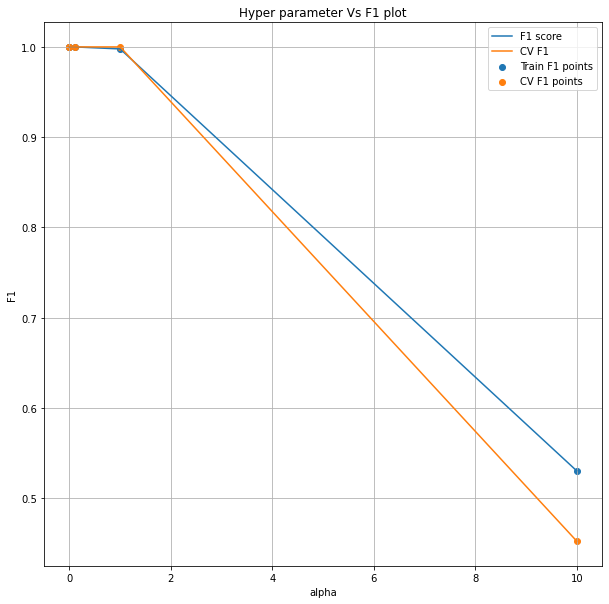

In [ ]:
train_f1= results['mean_train_score']
cv_f1 = results['mean_test_score']
alpha = results['param_alpha']

plt.figure(figsize=(10,10))
plt.plot(alpha, train_f1, label='F1 score')
plt.plot(alpha, cv_f1, label='CV F1')
plt.scatter(alpha, train_f1, label='Train F1 points')
plt.scatter(alpha, cv_f1, label='CV F1 points')
plt.legend()
plt.xlabel("alpha")
plt.ylabel("F1")
plt.title("Hyper parameter Vs F1 plot")
plt.grid()
plt.show()

In [ ]:
logitic=SGDClassifier(loss='log',alpha=0.01)
best_model=logitic.fit(X,Y)
w=best_model.coef_
best_model_accuracy=best_model.score(X,Y)
X_copy = data.drop(['target'], axis=1).values
Y_copy = data['target'].values
X_copy+=0.01
best_model_eddited=logitic.fit(X_copy,Y_copy)
best_model_accuracy_edited=best_model_eddited.score(X_copy,Y_copy)
w_dash=best_model_eddited.coef_
per_change=(np.abs(w-w_dash)/np.abs(w))*100
per_change

array([[0.10098683, 0.43806135, 0.70290282, 0.6711431 , 0.43806135,
        0.67897225, 3.02334138]])

In [ ]:
df=pd.DataFrame(per_change.T)
df.sort_values(by=0,inplace=True,ascending=False)
features_index=list(df.index[:4])
dict1={}
for i,j in enumerate(data.columns):
  dict1[i]=j
dict3={}
for i,j in dict1.items():
  if i in features_index:
    dict3[j]=per_change[0][i]
final_Df=pd.DataFrame({"values":list(dict3.keys()),"per_change":(list(dict3.values()))})
final_Df.sort_values(by='per_change',inplace=True,ascending=False)
final_Df

,values,per_change
3,w,3.023341
0,z,0.702903
2,2*z+3*x*x,0.678972
1,x*x,0.671143


In [ ]:
print("difference between best_model_accuracy_edited and best_model_accuracy= ",best_model_accuracy-best_model_accuracy_edited)

difference between best_model_accuracy_edited and best_model_accuracy=  0.0


**Linear SVM**

In [ ]:
grid_s1=GridSearchCV(SGDClassifier(),param_grid={'alpha':[0.0001,0.001,0.1,1,10]},cv=10,scoring=f1,return_train_score=True)
grid_s1.fit(X,Y)

GridSearchCV(cv=10, estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10]},
             return_train_score=True, scoring=make_scorer(f1_score))

In [ ]:
results1=pd.DataFrame(grid_s1.cv_results_)
results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001431,0.000951,0.001290,0.000434,0.0001,{'alpha': 0.0001},1.00,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.0,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000767,0.000165,0.001007,0.000233,0.001,{'alpha': 0.001},1.00,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.0,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.000670,0.000039,0.000850,0.000034,0.1,{'alpha': 0.1},1.00,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.0,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.000649,0.000019,0.000825,0.000008,1,{'alpha': 1},1.00,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.0,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.000636,0.000025,0.000837,0.000029,10,{'alpha': 10},0.75,0.666667,0.666667,0.571429,...,0.676692,0.52459,0.5,0.125,0.392857,0.392857,0.676692,0.676692,0.509035,0.170566


In [ ]:
SVM=SGDClassifier(alpha=0.001)
model1=SVM.fit(X,Y)
w1=model1.coef_
best_model1_accuracy=model1.score(X,Y)
model2=SVM.fit(X_copy,Y_copy)
w_dash1=model2.coef_
best_model_accuracy_edited1=model2.score(X_copy,Y_copy)
per_change1=(np.abs(w1-w_dash1)/np.abs(w1))*100
df1=pd.DataFrame(per_change1.T)
df1.sort_values(by=0,inplace=True,ascending=False)
features_index1=list(df1.index[:4])

dict2={}
for i,j in dict1.items():
  if i in features_index1:
    dict2[j]=per_change1[0][i]
final_Df1=pd.DataFrame({"values":list(dict2.keys()),"per_change":list(dict2.values())})
final_Df1.sort_values(by='per_change',inplace=True,ascending=False)
final_Df1

,values,per_change
0,y,43.908269
2,2*y,43.908269
3,w,24.415425
1,x*x,22.184569


In [ ]:
print("difference between best_model_accuracy_edited and best_model_accuracy= ",best_model1_accuracy-best_model_accuracy_edited1)

difference between best_model_accuracy_edited and best_model_accuracy=  0.0


Observations:
1. For logistic regression, the optimal alpha value is 0.001. It can be seen in the weights difference between the best model and best editted model is not much. The highest deviated column is zwhich is approximately 3% changed.
2. But for SVM , there is huge difference between the columns when a small error is indroduced which shows the prescence of multicolinearity in the data. Almost 135% change has come in the weight for 'y' which shows svm models are highly affected by multicolinearity.
3. Both weights in the model are deviating when a small error is introduced in the data which shows that we cannot use the weights for feature importance as the features are highly correlated.